## Imports

In [1]:
#@title Import the Dependencies
# Import the dependencies

import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Analysis

This dataset contains only female gender

In [2]:
df = pd.read_csv('./diabetes.csv')

In [89]:
# Printing first 5 rows of data frame 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,26,33.600000,0.627,50,1
1,1,85.0,66,29.000000,26,26.600000,0.351,31,0
2,8,183.0,64,20.428571,26,23.300000,0.672,32,1
3,1,89.0,66,23.000000,94,28.100000,0.167,21,0
5,5,116.0,74,20.428571,26,25.600000,0.201,30,0
6,3,78.0,50,32.000000,88,31.000000,0.248,26,1
7,10,115.0,72,20.428571,26,35.300000,0.134,29,0
9,8,125.0,96,20.428571,26,31.649728,0.232,54,1
10,4,110.0,92,20.428571,26,37.600000,0.191,30,0
11,10,168.0,74,20.428571,26,38.000000,0.537,34,1


In [4]:
# number of rows and columns of the dataframe

df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
# statistical measure of the data

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,719.0,3.824757,3.271792,0.000,1.000000,3.000,6.000,13.0
Glucose,719.0,119.946983,29.543108,44.000,99.000000,115.000,137.500,199.0
BloodPressure,719.0,72.257302,11.346002,38.000,64.000000,72.000,80.000,108.0
SkinThickness,719.0,26.098550,8.993959,7.000,20.428571,22.000,32.000,54.0
Insulin,719.0,81.815021,79.919758,15.000,26.000000,26.000,120.000,415.0
BMI,719.0,32.147354,6.539771,18.200,27.400000,32.000,36.100,57.3
DiabetesPedigreeFunction,719.0,0.446949,0.278267,0.078,0.242000,0.362,0.599,1.4
Age,719.0,32.840056,11.280706,21.000,24.000000,29.000,40.000,68.0
Outcome,719.0,0.336579,0.472868,0.000,0.000000,0.000,1.000,1.0


**Basic Summary :**

Data is related to healthcare Industry having 768 observations with 9 variable. Target variable is Outcome. It looks like there is no missing value, and boolean, float , integers are different datatypes available. Well descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers, I will be treating them later. I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, But maximum month of pregnancy is 17 which does not make any sense, I will be dealing later. Variance among different predictor variable is varying at large scale , Scaling data will be helpful for Predective modelling.

**Pregnancy Variable**

In [7]:
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_month = np.array(df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)

In [8]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


Plot

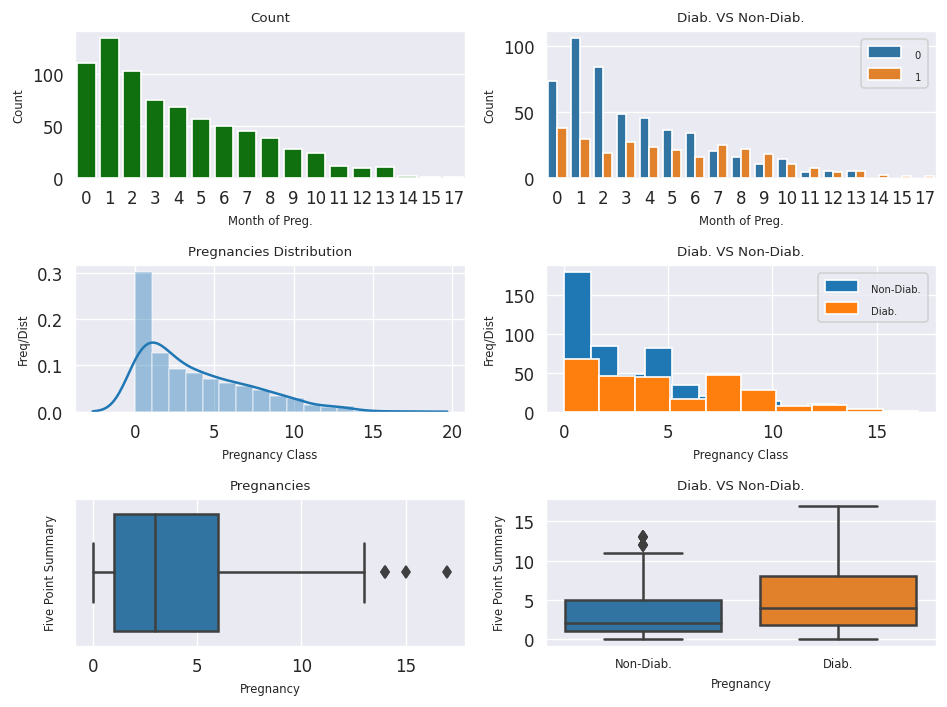

In [9]:
#@title 
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('Pregnancies',data=df,ax=axes[0][0],color='green')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.countplot('Pregnancies',data=df,hue='Outcome',ax=axes[0][1])
axes[0][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10 = sns.distplot(df['Pregnancies'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot11 = df[df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=df[df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()

plot20 = sns.boxplot(df['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()

**Understanding Distribution**

The distribution of Pregnancies in data is unimodal and skewed to the right, centered at about 1 with most of the data between 0 and 15, A range of roughly 15, and outliers are present on the higher end.

Note :- BoxPlot of both categories shows that People with higher pregnancy months have higher risk of Diabetes.

**Glucose Variable**

In [10]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

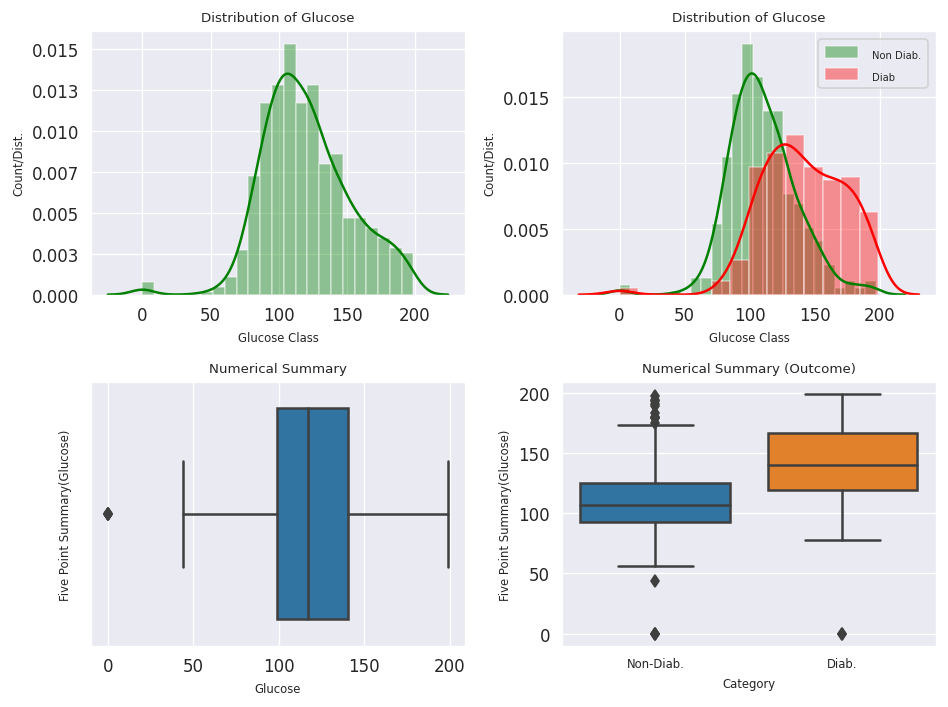

In [11]:
#@title
#sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))


plot00=sns.distplot(df['Glucose'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['Glucose'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['Glucose'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()


**Understanding Distribution**

The distribution of Glucose level among patients is unimodal and roughly bell shaped, centered at about 115 with most of the data between 90 and 140, A range of roughly 150, and outliers are present on the lower end(Glucose ==0).

Note :- BoxPlot of both categories shows that People with higher Glucose level have higher risk of Diabetes. We can also see that some outliers are present on non diabetic patient observation.

**Let us verify distribution by keeping only non zero entry of Glucose**

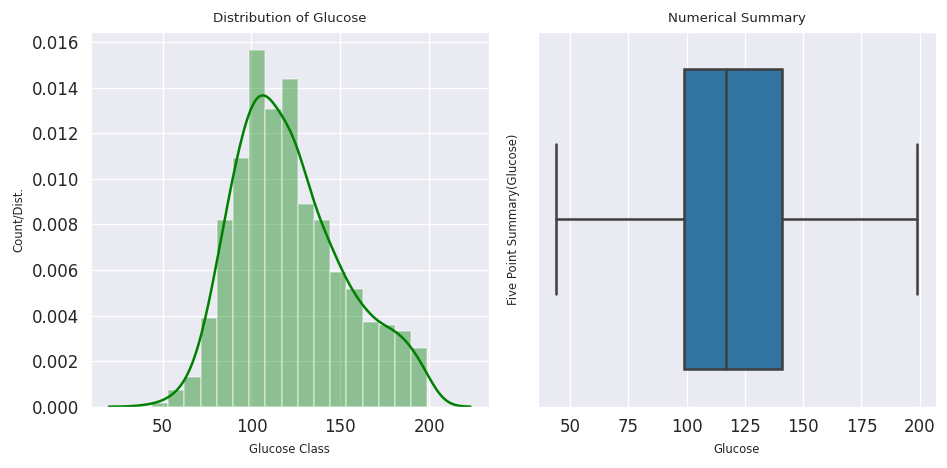

In [12]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Glucose']!=0]['Glucose'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

**Blood Preasure Variable**

In [13]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

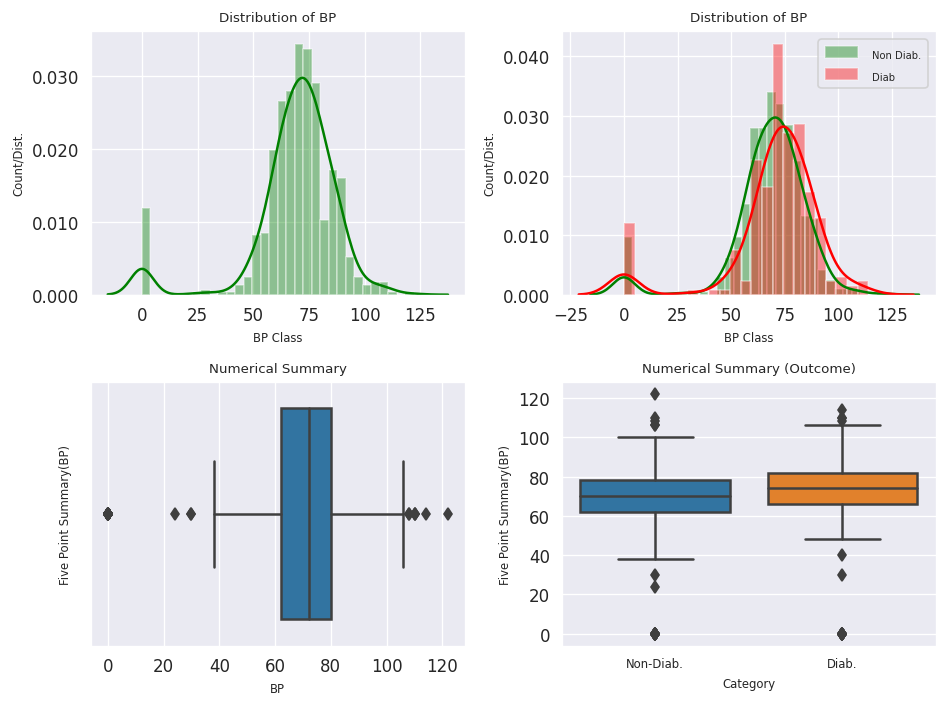

In [14]:
#@title 
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['BloodPressure'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['BloodPressure'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0][1].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['BloodPressure'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('BP',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='BloodPressure',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

**Understanding Distribution**

The distribution of BloodPressure among patients is unimodal (This is not a bimodal because BP=0 does not make any sense and it is Outlier) and bell shaped, centered at about 65 with most of the data between 60 and 90, A range of roughly 100, and outliers are present on the lower end(BP ==0).

Note :- BoxPlot of both categories shows that there is a little association of BP with Diabetic VS Non-Diabetic patients. We can also see that some outliers are present.

**Let us verify distribution by keeping only non zero entry of Glucose**

Please notice how outliers can change your whole understanding about data.

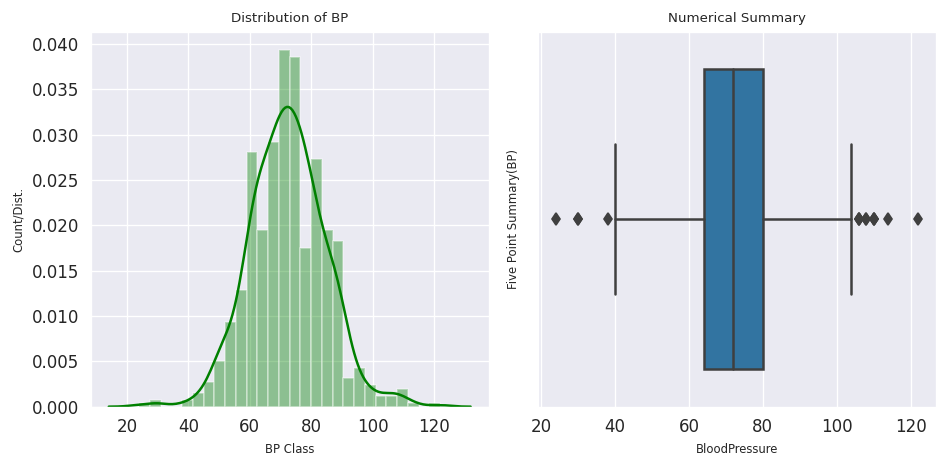

In [15]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

**Skin Thickness Variable**

In [16]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

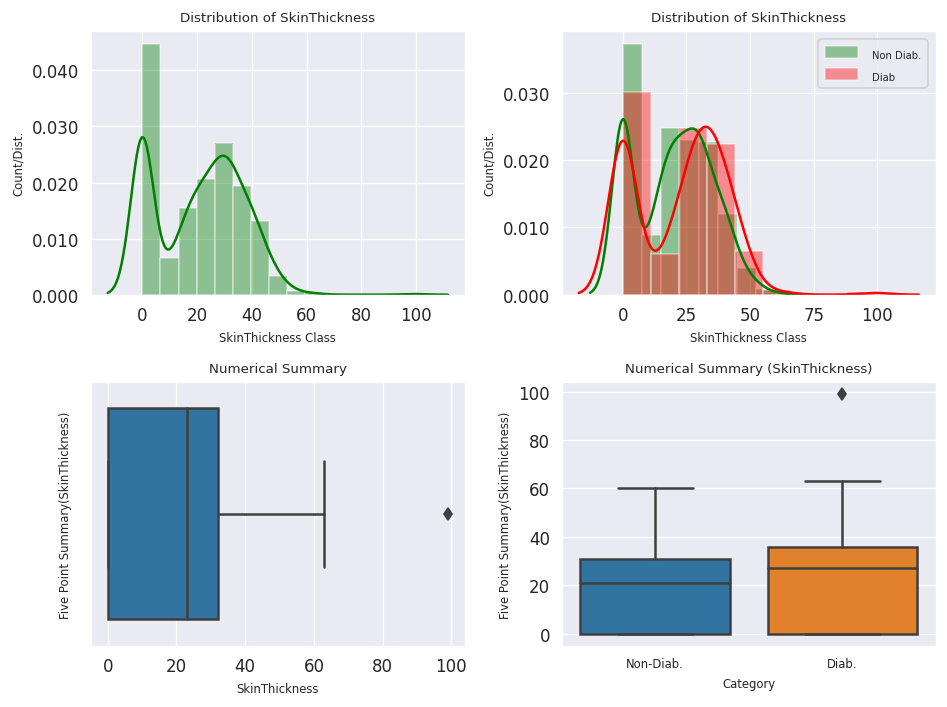

In [17]:
#@title 
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0][0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(df[df['Outcome']==False]['SkinThickness'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(df[df.Outcome==True]['SkinThickness'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0][1].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(df['SkinThickness'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='SkinThickness',data=df,ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (SkinThickness)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

**Understanding Distribution**

The distribution of SkinThickness among patients is looking like Bimodal (But i think, This is not a bimodal because ST=0 does not make any sense and it may effect distribution, I will verify it :)) and it is bell shaped, centered at about 20 with most of the data between 15 and 45, A range of roughly 60, and outliers are present on the lower end(ST ==0).

Note :- BoxPlot of both categories shows that there is a little association of ST among Diabetic VS Non-Diabetic patients. 

**Let us verify distribution by keeping only non zero Sking Thickness**

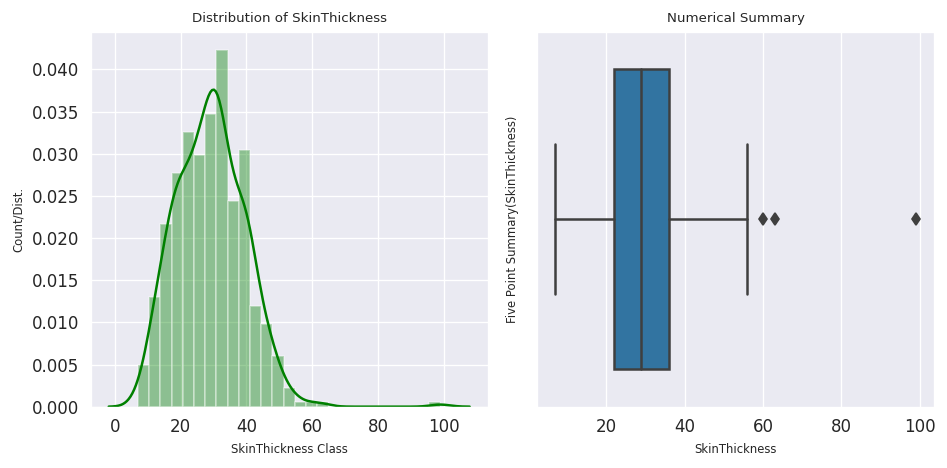

In [18]:
#@title 
from matplotlib.ticker import FormatStrFormatter

sns.set_style('darkgrid')
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))


plot0=sns.distplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()

In [19]:
# number of dibetics vs non-dibetics 

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-diabetics <br>
1 --> Diabetics

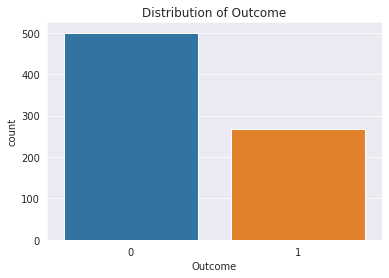

In [20]:
sns.countplot(df['Outcome']).set_title('Distribution of Outcome')
plt.show()

In [21]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Data Preprocessing

Missing Values & Outliers
Let us look to missing values and handle them. First I create function to handle outliers.Standard deviation based detection.

In [1]:
#@title 
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

In [2]:
df.isnull().sum()

NameError: ignored

It looks like there is no missing values. 

But in descriptive statistics we have seen that some variables have minimum = 0 and pregnancy variable has maximum = 17 which is not making sense. So let us explore these variables and treat them accordingly.

Please note we have seen that variables are following normal distribution , So with Statistical Evidence we can fill values using Mean, Median and Mode.

In [ ]:
df['Pregnancies'].describe()

We can see that minimum is 0 which may be considered as no Pregnancy, But maximum is 17 which is not making sense. Let us see distribution and also boxplot for outliers

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
#@title 
#Treating Outlier and then verifying it

df = std_based('Pregnancies',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='red')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='yellow')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Well, we are done with Pregnancy variable. Let us see next one.

In [ ]:
df['Glucose'].describe()

Glucose = 0, does not make any sense.

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

There is no outlier and also distribution is normal , So i will treat 0 with mean value

In [ ]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.head()

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Well, done with Glucose also,Let us see next.

In [ ]:
df.BloodPressure.describe()

We need to look at BP=0

In [ ]:
#@title 

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()



It looks like there are few Outliers at both higher end and lower end. But at higher end maximum BP is 122, So it is considerable. Now at lower end BP near 25 is not making sense. So i will treat missing value with medium and then i will also treat outliers.

In [ ]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

In [ ]:
df  = std_based('BloodPressure',df)

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Well , Let us see next one.

In [ ]:
df.SkinThickness.describe()

Let us look at 0 SkinThickness.

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

In [ ]:
df = std_based("SkinThickness",df)

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Can you see , I am using plot twice one before treating and another after treatment. Look at changes :), Let us see next variable.

In [ ]:
df.Insulin.describe()

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

We can see there are many outliers. So i will fill 0 with Median of Insulin. I will also treat Outliers after removing zero.

In [ ]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

In [ ]:
df = std_based('Insulin',df)

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Please observe the scale at Y axis to see if outliers has been treated to some extent :)

In [ ]:
df.BMI.describe()

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Outliers are considerable, So i will replace zero with mean.

In [ ]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.DiabetesPedigreeFunction.describe()

Well things is fine here, Let us see for Outliers.

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DiabetesPedigreeFunction',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Outliers are present at higher end. Let us treat them.

In [ ]:
#@title 
df = std_based('DiabetesPedigreeFunction',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DiabetesPedigreeFunction',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.Age.describe()


Let us take a look for outliers.

In [ ]:
#@title 
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
#@title 
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

Now we are done with missing value and Outliers. Let us take a look at data and then move ahead with other steps.

## Data Standerdization 

In [78]:
# seprating features and labels

X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

In [79]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6    148.0             72  ...  33.6                     0.627   50
1              1     85.0             66  ...  26.6                     0.351   31
2              8    183.0             64  ...  23.3                     0.672   32
3              1     89.0             66  ...  28.1                     0.167   21
5              5    116.0             74  ...  25.6                     0.201   30
..           ...      ...            ...  ...   ...                       ...  ...
763           10    101.0             76  ...  32.9                     0.171   63
764            2    122.0             70  ...  36.8                     0.340   27
765            5    121.0             72  ...  26.2                     0.245   30
766            1    126.0             60  ...  30.1                     0.349   47
767            1     93.0             70  ...  30.4                     0.315   23

[71

In [80]:
print(Y)

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 719, dtype: int64


**Statistical Assumption**

Let us check for some assumption like variance. Distribution is absolutely fine. We have already seen in that.

In [81]:
X.var()

Pregnancies                   10.704623
Glucose                      872.795253
BloodPressure                128.731754
SkinThickness                 80.891303
Insulin                     6387.167685
BMI                           42.768611
DiabetesPedigreeFunction       0.077433
Age                          127.254326
dtype: float64

Variance is varying to a greater extent, So i will standardize. 

In [82]:
# I am removing dpf because variance is very low.
# X.drop('DiabetesPedigreeFunction')

In [83]:
scalar = StandardScaler()
scaled_df = scalar.fit(X)

In [84]:
scaled_data = scalar.transform(X)

In [85]:
scaled_data

array([[ 0.66531052,  0.95022315, -0.02269354, ...,  0.22227951,
         0.64749497,  1.52223541],
       [-0.86396782, -1.18373837, -0.55188232, ..., -0.84883941,
        -0.34504689, -0.16322884],
       [ 1.27702186,  2.13575733, -0.72827858, ..., -1.35379548,
         0.80932245, -0.0745202 ],
       ...,
       [ 0.35945485,  0.03566821, -0.02269354, ..., -0.91004621,
        -0.72624051, -0.25193749],
       [-0.86396782,  0.20503024, -1.08107111, ..., -0.31327995,
        -0.35223923,  1.25610948],
       [-0.86396782, -0.91275913, -0.1990898 , ..., -0.26737485,
        -0.47450888, -0.872898  ]])

In [86]:
X = scaled_data

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state= 1)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(719, 8) (575, 8) (144, 8)


## Training the model

In [67]:
classifier = svm.SVC(kernel='linear')

In [68]:
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Evaluate the model

In [69]:
X_train_prediction = classifier.predict(X_train)

In [70]:
training_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_accuracy)

0.782608695652174


In [71]:
X_test_prediction = classifier.predict(X_test)

In [72]:
testing_accuracy = accuracy_score(X_test_prediction, Y_test)

In [73]:
print(testing_accuracy)

0.7986111111111112


## Making a predicitve system

Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age,

In [96]:
input_data = (1,120,68,39,183,37.7,0.254,41)

# change input_data to numpy array

input_data_to_numpy_array = np.asarray(input_data)

input_data_to_numpy_array.shape

(8,)

In [97]:
# Reshape the array

input_data_reshaped = input_data_to_numpy_array.reshape(1,-1) 

input_data_reshaped.shape

(1, 8)

In [98]:
# standerdize the input_data

input_std = scalar.transform(input_data_reshaped)

print(input_std)

[[-0.86396782  0.00179581 -0.37548606  1.43545587  1.26696352  0.84964917
  -0.69387502  0.72385761]]


In [99]:
prediction = classifier.predict(input_std)


if (prediction[0] == 1):
    print('This person is having a high chance diabetes')
else:
    print('This person is having a less chance of diabetes')

This person is having a less chance of diabetes
